Technical analysis for sp500 (Backtesting of trend signal strategy)

Buy signal(go long)
The 42d trend is for the first time SD points above 252d trend
Wait (Part in cash)
The 42d treand is within a range of +/- SD points around 252d trend
Sell signal(go short)
The 42d trend is for the first time SD points below 252d trend

Based on the book: Python for finance

In [112]:
import fix_yahoo_finance as yf
sp500 = yf.download("^GSPC", start="2001-01-01", end="2017-06-08")
#2001-1-1 2014-4-14

https://query1.finance.yahoo.com/v7/finance/download/^GSPC?period1=978278400&period2=1496851200&interval=1d&events=history&crumb=DWum38JuGoJ


In [113]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4132 entries, 2001-01-02 to 2017-06-07
Data columns (total 6 columns):
Open         4132 non-null float64
High         4132 non-null float64
Low          4132 non-null float64
Close        4132 non-null float64
Adj Close    4132 non-null float64
Volume       4132 non-null int32
dtypes: float64(5), int32(1)
memory usage: 209.8 KB


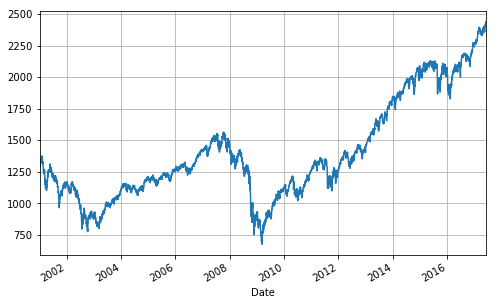

In [114]:
sp500['Close'].plot(grid=True, figsize=(8, 5))
# tag: sp500
# title: Historical levels of the S&P 500 index

In [115]:
sp500['42d'] = np.round(sp500['Close'].rolling(window=42).mean(), 2)
sp500['252d'] = np.round(sp500['Close'].rolling(window=252).mean(), 2)

In [116]:
sp500[['Close', '42d', '252d']].tail()

,Close,42d,252d
Date,,,
2017-06-01,2430.060059,2379.87,2237.92
2017-06-02,2439.070068,2381.78,2239.27
2017-06-05,2436.100098,2383.59,2240.58
2017-06-06,2429.330078,2385.41,2241.89
2017-06-07,2433.139893,2387.21,2243.18


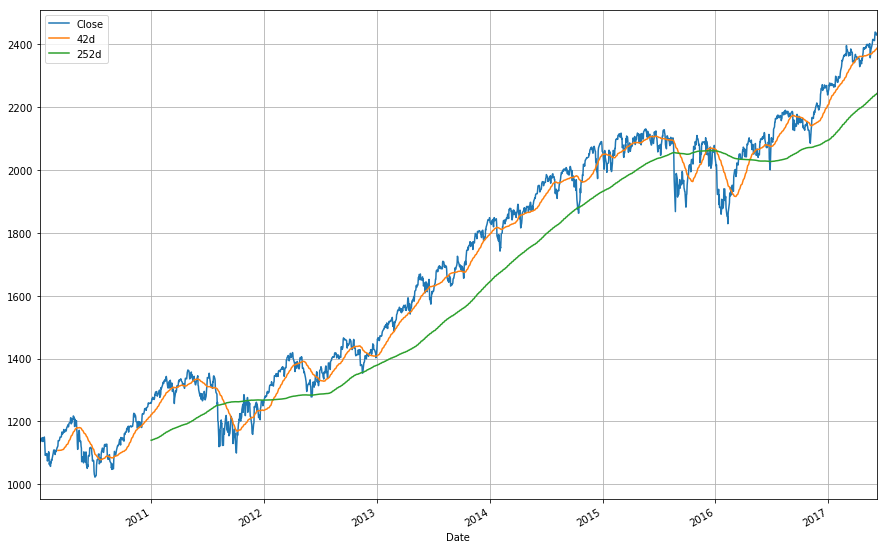

In [104]:
sp500[['Close', '42d', '252d']].plot(grid=True, figsize=(15, 10))
# tag: sp500_trend
# title: The S&P 500 index with 42d and 252d trend lines

In [121]:
sp500['42-252'] = sp500['42d'] - sp500['252d']
sp500['42-252'].tail()

Date
2017-06-01    141.95
2017-06-02    142.51
2017-06-05    143.01
2017-06-06    143.52
2017-06-07    144.03
Name: 42-252, dtype: float64

In [122]:
sp500['42-252'].head()

Date
2001-01-02   NaN
2001-01-03   NaN
2001-01-04   NaN
2001-01-05   NaN
2001-01-08   NaN
Name: 42-252, dtype: float64

In [123]:
SD = 50
sp500['Regime'] = np.where(sp500['42-252'] > SD, 1, 0)
sp500['Regime'] = np.where(sp500['42-252'] < -SD, -1, sp500['Regime'])
sp500['Regime'].value_counts()

 1    2056
 0    1378
-1     698
Name: Regime, dtype: int64

(-1.1, 1.1)

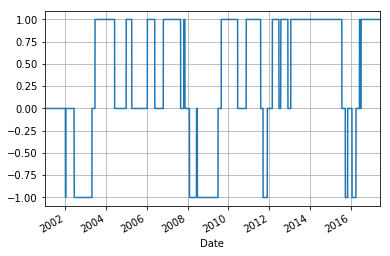

In [124]:
import numpy as np
import matplotlib.pyplot as plt
sp500['Regime'].plot(lw=1.5, grid=True)
plt.ylim([-1.1, 1.1])
# tag: sp500_signal
# title: Signal regimes over time

In [125]:
sp500['Market'] = np.log(sp500['Close'] / sp500['Close'].shift(1))

In [126]:
sp500['Strategy'] = sp500['Regime'].shift(1) * sp500['Market']

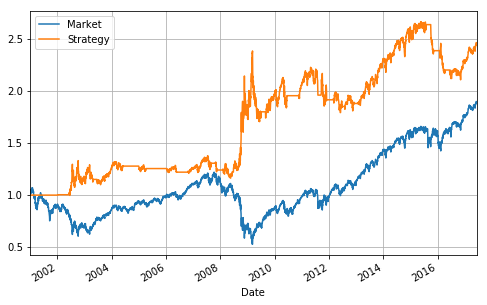

In [127]:
sp500[['Market', 'Strategy']].cumsum().apply(np.exp).plot(grid=True,figsize=(8, 5))
# tag: sp500_wealth
# title: The S&P 500 index vs. investor's wealth